In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#하이퍼파라미터-세팅-및-seed-고정" data-toc-modified-id="하이퍼파라미터-세팅-및-seed-고정-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>하이퍼파라미터 세팅 및 seed 고정</a></span></li><li><span><a href="#학습-데이터-EDA" data-toc-modified-id="학습-데이터-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>학습 데이터 EDA</a></span></li><li><span><a href="#데이터-전처리-함수-정의-(Dataset)" data-toc-modified-id="데이터-전처리-함수-정의-(Dataset)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>데이터 전처리 함수 정의 (Dataset)</a></span></li><li><span><a href="#Dataset-정의-및-DataLoader-할당" data-toc-modified-id="Dataset-정의-및-DataLoader-할당-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dataset 정의 및 DataLoader 할당</a></span><ul class="toc-item"><li><span><a href="#데이터-샘플-시각화-(Show-example-image-and-mask)" data-toc-modified-id="데이터-샘플-시각화-(Show-example-image-and-mask)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>데이터 샘플 시각화 (Show example image and mask)</a></span></li></ul></li><li><span><a href="#baseline-model" data-toc-modified-id="baseline-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>baseline model</a></span><ul class="toc-item"><li><span><a href="#FCN8s-(VGG-imageNet-weight)" data-toc-modified-id="FCN8s-(VGG-imageNet-weight)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>FCN8s (VGG imageNet weight)</a></span></li></ul></li><li><span><a href="#train,-validation,-test-함수-정의" data-toc-modified-id="train,-validation,-test-함수-정의-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>train, validation, test 함수 정의</a></span></li><li><span><a href="#모델-저장-함수-정의" data-toc-modified-id="모델-저장-함수-정의-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>모델 저장 함수 정의</a></span></li><li><span><a href="#모델-생성-및-Loss-function,-Optimizer-정의" data-toc-modified-id="모델-생성-및-Loss-function,-Optimizer-정의-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>모델 생성 및 Loss function, Optimizer 정의</a></span></li><li><span><a href="#저장된-model-불러오기-(학습된-이후)" data-toc-modified-id="저장된-model-불러오기-(학습된-이후)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>저장된 model 불러오기 (학습된 이후)</a></span></li><li><span><a href="#submission을-위한-test-함수-정의" data-toc-modified-id="submission을-위한-test-함수-정의-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>submission을 위한 test 함수 정의</a></span></li><li><span><a href="#submission.csv-생성" data-toc-modified-id="submission.csv-생성-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>submission.csv 생성</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Reference</a></span></li></ul></div>

In [2]:
!pip install adamp
!pip install segmentation_models_pytorch
!pip install --upgrade --force-reinstall --no-deps albumentations

  Created wheel for adamp: filename=adamp-0.3.0-cp37-none-any.whl size=5999 sha256=bf5a67819c4334dfe7e4d0650a888390a62b25a82571131b52c4cd416c31dcf5
  Stored in directory: /root/.cache/pip/wheels/6a/89/67/879fe55977ebcbfaa5b929eb111af7fe11eb3552867850dd76
Successfully built adamp
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 245kB 28.5MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp37-none-any.whl size=60963 sha256=56ff1b5dd380283c67d66b870cf10fd8db2b48142d54f67506465fca03bd7e90
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-cp37-none-any.whl size=12420 sha256=abcbf4ab7653230858320610cae65dc874dab89215731bff12c10f9d37fc63d0
  Stored in directory: /root/.cache/pip/wheels/42/1e/a9/2a578ba9ad04e776e80bf0f70d8a7f4c29ec0718b92

https://github.com/jorge-pessoa/pytorch-msssim

ms-ssim loss를 사용하려면 위의 github에서 말한 걸 그대로 따라하시면 됩니다...

저의 경우 Colab에서 진행하다보니 밑의 몇가지 셀은 ms-ssim 함수 사용을 위한 것이므로 본인의 환경에 맞게 사용하시거나 생략해주세요

In [1]:
!git clone https://github.com/jorge-pessoa/pytorch-msssim.git

Cloning into 'pytorch-msssim'...
remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 169 (delta 15), reused 15 (delta 6), pack-reused 136
Receiving objects: 100% (169/169), 1.24 MiB | 8.49 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [5]:
import os
print(os.getcwd())
os.chdir('./pytorch-msssim')
print(os.getcwd())

/content
/content/pytorch-msssim


In [6]:
!python setup.py install

running install
running build
running build_py
creating build
creating build/lib
creating build/lib/pytorch_msssim
copying pytorch_msssim/__init__.py -> build/lib/pytorch_msssim
running install_lib
creating /usr/local/lib/python3.7/dist-packages/pytorch_msssim
copying build/lib/pytorch_msssim/__init__.py -> /usr/local/lib/python3.7/dist-packages/pytorch_msssim
byte-compiling /usr/local/lib/python3.7/dist-packages/pytorch_msssim/__init__.py to __init__.cpython-37.pyc
running install_egg_info
Writing /usr/local/lib/python3.7/dist-packages/pytorch_msssim-0.1.egg-info


In [1]:
import os
print(os.getcwd())
os.chdir('./drive/MyDrive/Stage3_Segmentation&Detection/code')
print(os.getcwd())

/content
/content/drive/MyDrive/Stage3_Segmentation&Detection/code


In [2]:
import os
import random
import time
import json
import warnings 
warnings.filterwarnings('ignore')
import datetime

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from utils_custom import label_accuracy_score, add_hist
import cv2
from adamp import AdamP
import gc
import segmentation_models_pytorch as smp

import numpy as np
import pandas as pd

# 전처리를 위한 라이브러리
from pycocotools.coco import COCO
import torchvision
import torchvision.transforms as transforms

import albumentations as A
from albumentations.pytorch import ToTensorV2

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.rcParams['axes.grid'] = False

print('pytorch version: {}'.format(torch.__version__))
print('GPU 사용 가능 여부: {}'.format(torch.cuda.is_available()))

print(torch.cuda.get_device_name(0))
print(torch.cuda.device_count())

device = "cuda" if torch.cuda.is_available() else "cpu"   # GPU 사용 가능 여부에 따라 device 정보 저장

pytorch version: 1.8.1+cu101
GPU 사용 가능 여부: True
Tesla V100-SXM2-16GB
1


## 하이퍼파라미터 세팅 및 seed 고정

In [3]:
batch_size = 16   # Mini-batch size
num_epochs = 20
learning_rate = 1e-4

In [4]:
# seed 고정
random_seed = 21
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
# torch.cuda.manual_seed_all(random_seed) # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)

In [5]:
gc.collect()
torch.cuda.empty_cache()

In [6]:
!nvidia-smi

Fri Apr 30 21:30:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    23W / 300W |      2MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 학습 데이터 EDA

In [7]:
%matplotlib inline

dataset_path = '../input/data'
anns_file_path = dataset_path + '/' + 'train.json'

# Read annotations
with open(anns_file_path, 'r') as f:
    dataset = json.loads(f.read())

categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

# Load categories and super categories
cat_names = []
super_cat_names = []
super_cat_ids = {}
super_cat_last_name = ''
nr_super_cats = 0
for cat_it in categories:
    cat_names.append(cat_it['name'])
    super_cat_name = cat_it['supercategory']
    # Adding new supercat
    # super category에 대한 id가 따로 json에 설정되있지 않아서 보기 위해 설정하는것.?!
    if super_cat_name != super_cat_last_name:
        super_cat_names.append(super_cat_name)
        super_cat_ids[super_cat_name] = nr_super_cats
        super_cat_last_name = super_cat_name
        nr_super_cats += 1

print('Number of super categories:', nr_super_cats)
print('Number of categories:', nr_cats)
print('Number of annotations:', nr_annotations)
print('Number of images:', nr_images)

Number of super categories: 11
Number of categories: 11
Number of annotations: 21116
Number of images: 2617


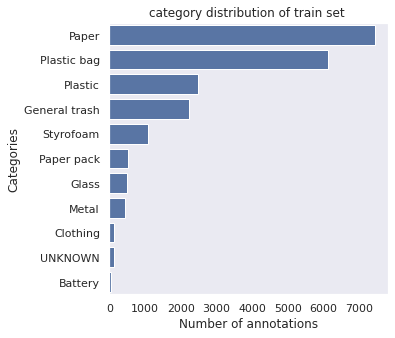

In [8]:
# Count annotations
# 각 category의 class가 총 몇개있는지 cat_histogram에 저장
cat_histogram = np.zeros(nr_cats,dtype=int)
for ann in anns:
    cat_histogram[ann['category_id']] += 1

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,5))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
# Number of annotations 컬럼을 기준으로 False : 내림차순으로 dataframe을 정렬
df = df.sort_values('Number of annotations', 0, False)

# Plot the histogram
plt.title("category distribution of train set ")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df, label="Total", color="b")

In [9]:
# category labeling 
# 앞서 df.sort_value 때문에 섞인 index를 다시 정렬함 -> 확인 필요
sorted_temp_df = df.sort_index()

# background = 0 에 해당되는 label 추가 후 기존들을 모두 label + 1 로 설정
# background가 주어진 annotation에 category로 설정이 되어 있지 않다 -> annotation에 background pixel들이 없다 -> annotation 없는 픽셀들 background로 설정해주는 코드를 Dataset 제작시 직접 추가해야 한다.
sorted_df = pd.DataFrame(["Backgroud"], columns = ["Categories"])
sorted_df = sorted_df.append(sorted_temp_df, ignore_index=True)

In [ ]:
# class (Categories) 에 따른 index 확인 (0~11 : 총 12개)
sorted_df

,Categories,Number of annotations
0,Backgroud,NaN
1,UNKNOWN,128.0
2,General trash,2225.0
3,Paper,7448.0
4,Paper pack,527.0
5,Metal,449.0
6,Glass,488.0
7,Plastic,2472.0
8,Styrofoam,1074.0
9,Plastic bag,6114.0


## 데이터 전처리 함수 정의 (Dataset)

In [10]:
category_names = list(sorted_df.Categories)

# classID 하나의 class ID -> int일것으로 예상
# cats 전체 category들에 대한 info가 들어 있는 ?로 예상
# 즉, 하나의 class ID와 전체 category 정보를 입력으로 받아 해당 class ID의 class 'name'을 반환하는 함수
def get_classname(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"

class CustomDataLoader(Dataset):
    """COCO format"""
    def __init__(self, data_dir, mode = 'train', transform = None):
        super().__init__()
        self.mode = mode
        self.transform = transform
        self.coco = COCO(data_dir)
        
    def __getitem__(self, index: int):
        # dataset이 index되어 list처럼 동작
        # 해당 index의 Image의 Id를 반환
        image_id = self.coco.getImgIds(imgIds=index)
        # 해당 Id의 Image의 정보들을 반환
        image_infos = self.coco.loadImgs(image_id)[0]
        
        # cv2 를 활용하여 image 불러오기
        images = cv2.imread(os.path.join(dataset_path, image_infos['file_name']))
        # images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB).astype(np.float32)
        images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
        
        # images /=255
        
        if (self.mode in ('train', 'val')):
            # 해당 Id의 Image가 가지고 있는 category_id 를 반환
            ann_ids = self.coco.getAnnIds(imgIds=image_infos['id'])
            # 각각의 annotation id를 통해서 각각의 annotation 정보를 반환
            anns = self.coco.loadAnns(ann_ids)

            # Load the categories in a variable
            # category의 이름을 불러오기 위해 coco에서 불러옴
            cat_ids = self.coco.getCatIds()
            cats = self.coco.loadCats(cat_ids)

            # masks : size가 (height x width)인 2D
            # 각각의 pixel 값에는 "category id + 1" 할당
            # Background = 0
            # 각 pixel마다 class로 분류된 1 channel 이미지?가 생성된다
            masks = np.zeros((image_infos["height"], image_infos["width"]))
            # Unknown = 1, General trash = 2, ... , Cigarette = 11
            for i in range(len(anns)):
                className = get_classname(anns[i]['category_id'], cats)         # 여기랑
                pixel_value = category_names.index(className)                   # 여기 줄에서 굳이 pixel value를 이렇게 복잡하게 category_names로 부터 구하는 이유 
                                                                                # : annotation에는 background라는 class가 없어서 그렇슴당
                masks = np.maximum(self.coco.annToMask(anns[i])*pixel_value, masks) # coco.annToMask에 annotation 정보를 주면 해당 class에 대한 마스크 이미지 반환
            masks = masks.astype(np.float32)

            # transform -> albumentations 라이브러리 활용
            if self.transform is not None:
                transformed = self.transform(image=images, mask=masks)
                images = transformed["image"]
                masks = transformed["mask"]
            

            return images, masks, image_infos
        
        if self.mode == 'test':
            # transform -> albumentations 라이브러리 활용
            if self.transform is not None:
                transformed = self.transform(image=images)
                images = transformed["image"]
            
            return images, image_infos
    
    
    def __len__(self) -> int:
        # 전체 dataset의 size를 return
        return len(self.coco.getImgIds())

## Dataset 정의 및 DataLoader 할당

In [11]:
# train.json / validation.json / test.json 디렉토리 설정
train_path = dataset_path + '/train.json'
val_path = dataset_path + '/val.json'
test_path = dataset_path + '/test.json'

# collate_fn needs for batch
def collate_fn(batch):
    return tuple(zip(*batch))   # 컨테이터 타입의 batch라는 데이터를 unpacking

train_transform = A.Compose([
                            A.Resize(height=512, width=512),
                            A.Flip(),
                            A.RandomRotate90(), 
                            A.CLAHE(),
                            A.OneOf([A.RGBShift(r_shift_limit=20 , g_shift_limit =20, b_shift_limit= 20 ,p=1),
                                    A.ChannelShuffle(p=1)
                                    ], p=0.5),
                            A.OneOf([A.RandomContrast(p=1),
                                    A.RandomGamma(p=1),
                                    A.RandomBrightness(p=1)
                                    ], p=0.5),
                            A.OneOf([A.MotionBlur(p=1),
                                    A.OpticalDistortion(p=1),
                                    A.GaussNoise(p=1),
                                    ], p=0.5),
                            A.OneOf([A.RandomRain(p=1),
                                    A.RandomSnow(p=1),
                                    A.RandomSunFlare(p=1),
                                    A.RandomFog(p=1)], p=0.05),
                            A.Normalize(),
                            ToTensorV2() # 채널정보가 2번째 축으로 감 (8,512,512,3) -> (8,3,512,51)
                            ])

val_transform = A.Compose([
                          A.Normalize(),
                          ToTensorV2()
                          ])

test_transform = A.Compose([A.Normalize(),
                           ToTensorV2()
                           ])

# create own Dataset 1 (skip)
# validation set을 직접 나누고 싶은 경우
# random_split 사용하여 data set을 8:2 로 분할
# train_size = int(0.8*len(dataset))
# val_size = int(len(dataset)-train_size)
# dataset = CustomDataLoader(data_dir=train_path, mode='train', transform=transform)
# train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# create own Dataset 2
# train dataset
# CustomDataLoader라고 해서 헷갈렸지만 그냥 Dataset이라고 보면 되는 것 같다
train_dataset = CustomDataLoader(data_dir=train_path, mode='train', transform=train_transform)

# validation dataset
val_dataset = CustomDataLoader(data_dir=val_path, mode='val', transform=val_transform)

# test dataset
test_dataset = CustomDataLoader(data_dir=test_path, mode='test', transform=test_transform)


# DataLoader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=4,
                                           collate_fn=collate_fn)   # 크기가 batch_size인 텐서들의 리스트를 입력으로 받아 collate_fn 함수 실행
                                                                    # 즉, 미니배치로 묶는 역할을 하는 함수

val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                         batch_size=batch_size,
                                         shuffle=False,
                                         num_workers=4,
                                         collate_fn=collate_fn)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          num_workers=4,
                                          collate_fn=collate_fn)

loading annotations into memory...
Done (t=3.69s)
creating index...
index created!
loading annotations into memory...
Done (t=0.82s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


### 데이터 샘플 시각화 (Show example image and mask)

- `train_loader` 
- `val_loader` 
- `test_loader` 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image shape: [3, 512, 512]
mask shape:  [512, 512]
Unique values, category of transformed mask : 
 [{0, 'Backgroud'}, {3, 'Paper'}, {9, 'Plastic bag'}]


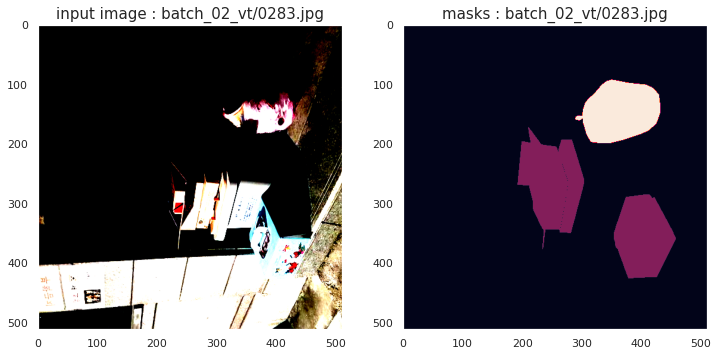

In [ ]:
# train_loader의 output 결과(image 및 mask) 확인
for imgs, masks, image_infos in train_loader:
    image_infos = image_infos[0] # 원래 image_infos에는 batch_size만큼의 이미지 정보가 있지만 여기선 첫번째 이미지만 볼거라 이래놓음
    temp_images = imgs
    temp_masks = masks
    
    break

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

print('image shape:', list(temp_images[0].shape))
print('mask shape: ', list(temp_masks[0].shape))
print('Unique values, category of transformed mask : \n', [{int(i),category_names[int(i)]} for i in list(np.unique(temp_masks[0]))])

ax1.imshow(temp_images[0].permute([1,2,0]))
ax1.grid(False)
ax1.set_title("input image : {}".format(image_infos['file_name']), fontsize = 15)

ax2.imshow(temp_masks[0])
ax2.grid(False)
ax2.set_title("masks : {}".format(image_infos['file_name']), fontsize = 15)

plt.show()

image shape: [3, 512, 512]
mask shape:  [512, 512]
Unique values, category of transformed mask : 
 [{0, 'Backgroud'}, {6, 'Glass'}, {'Plastic', 7}, {'Plastic bag', 9}]


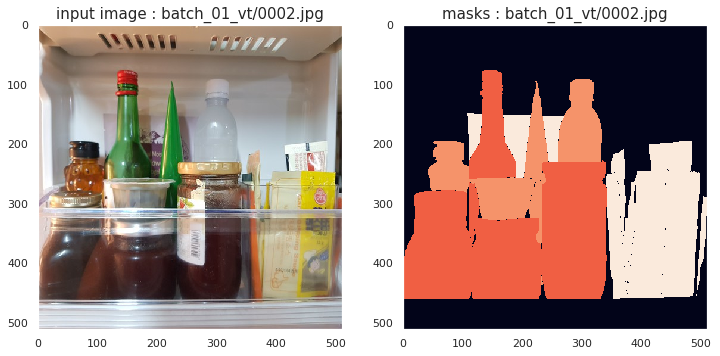

In [ ]:
# val_loader의 output 결과(image 및 mask) 확인
for imgs, masks, image_infos in val_loader:
    image_infos = image_infos[0]
    temp_images = imgs
    temp_masks = masks
    
    break

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

print('image shape:', list(temp_images[0].shape))
print('mask shape: ', list(temp_masks[0].shape))

print('Unique values, category of transformed mask : \n', [{int(i),category_names[int(i)]} for i in list(np.unique(temp_masks[0]))])

ax1.imshow(temp_images[0].permute([1,2,0]))
ax1.grid(False)
ax1.set_title("input image : {}".format(image_infos['file_name']), fontsize = 15)

ax2.imshow(temp_masks[0])
ax2.grid(False)
ax2.set_title("masks : {}".format(image_infos['file_name']), fontsize = 15)

plt.show()

image shape: [3, 512, 512]


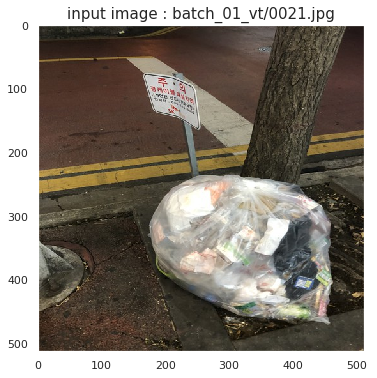

In [ ]:
# test_loader의 output 결과(image) 확인
# test_loader에는 info와 image만 있음. mask 없음.
for imgs, image_infos in test_loader:
    image_infos = image_infos[0]
    temp_images = imgs
    
    break


fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

print('image shape:', list(temp_images[0].shape))

ax1.imshow(temp_images[0].permute([1,2,0]))
ax1.grid(False)
ax1.set_title("input image : {}".format(image_infos['file_name']), fontsize = 15)

plt.show()

## baseline model

### FCN8s (VGG imageNet weight)

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision.models import vgg16

class FCN8s(nn.Module):
    def __init__(self, num_classes):
        super(FCN8s,self).__init__()
        self.pretrained_model = vgg16(pretrained = True)
        features, classifiers = list(self.pretrained_model.features.children()), list(self.pretrained_model.classifier.children())

        self.features_map1 = nn.Sequential(*features[0:17])
        self.features_map2 = nn.Sequential(*features[17:24])
        self.features_map3 = nn.Sequential(*features[24:31])
        
        # Score pool3
        self.score_pool3_fr = nn.Conv2d(256, num_classes, 1)
        
        # Score pool4        
        self.score_pool4_fr = nn.Conv2d(512, num_classes, 1)        
        
        # fc6 ~ fc7
        self.conv = nn.Sequential(nn.Conv2d(512, 4096, kernel_size = 1),
                                  nn.ReLU(inplace=True),
                                  nn.Dropout(),
                                  nn.Conv2d(4096, 4096, kernel_size = 1),
                                  nn.ReLU(inplace=True),
                                  nn.Dropout()
                                  )
        
        # Score
        self.score_fr = nn.Conv2d(4096, num_classes, kernel_size = 1)
        
        # UpScore2 using deconv
        self.upscore2 = nn.ConvTranspose2d(num_classes,
                                           num_classes,
                                           kernel_size=4,
                                           stride=2,
                                           padding=1)
        
        # UpScore2_pool4 using deconv
        self.upscore2_pool4 = nn.ConvTranspose2d(num_classes, 
                                                 num_classes, 
                                                 kernel_size=4,
                                                 stride=2,
                                                 padding=1)
        
        # UpScore8 using deconv
        self.upscore8 = nn.ConvTranspose2d(num_classes, 
                                           num_classes,
                                           kernel_size=16,
                                           stride=8,
                                           padding=4)
    
    def forward(self, x):
        pool3 = h = self.features_map1(x)
        pool4 = h = self.features_map2(h)
        h = self.features_map3(h)
        
        h = self.conv(h)
        h = self.score_fr(h)
       
        score_pool3c = self.score_pool3_fr(pool3)    
        score_pool4c = self.score_pool4_fr(pool4)
        
        # Up Score I
        upscore2 = self.upscore2(h)
        
        # Sum I
        h = upscore2 + score_pool4c
        
        # Up Score II
        upscore2_pool4c = self.upscore2_pool4(h)
        
        # Sum II
        h = upscore2_pool4c + score_pool3c
        
        # Up Score III
        upscore8 = self.upscore8(h)
        
        return upscore8

In [ ]:
# # 구현된 model에 임의의 input을 넣어 output이 잘 나오는지 test

model = FCN8s(num_classes=12)
# x = torch.randn([1, 3, 512, 512])
# print("input shape : ", x.shape)
# out = model(x).to(device)
# print("output shape : ", out.size())

model = model.to(device)

## Torchvision에서 제공하는 pretrained Segmentation들

In [ ]:
model = torchvision.models.segmentation.fcn_resnet50()
model.classifier[-1] = nn.Conv2d(512,12,kernel_size=1, stride=1)
model = model.to(device)

NotImplementedError: pretrained fcn_resnet50_coco is not supported as of now

In [ ]:
model = torchvision.models.segmentation.deeplabv3_resnet50()
model.classifier[-1] = nn.Conv2d(256,12,kernel_size=1, stride=1)
model = model.to(device)

## Segmentation Models PyTorch에서 제공하는 모델들

In [12]:
model = smp.DeepLabV3Plus(
    encoder_name="resnet50",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=12,                      # model output channels (number of classes in your dataset)
)

model = model.to(device)

In [13]:
!nvidia-smi

Fri Apr 30 21:32:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    37W / 300W |   1445MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## train, validation, test 함수 정의

In [14]:
def train(num_epochs, model, data_loader, val_loader, criterion, optimizer, saved_dir, val_every, device):
    print('Start training..')
    best_mIoU = 0
    for epoch in range(num_epochs):
        model.train()
        for step, (images, masks, _) in enumerate(data_loader):
            images = torch.stack(images)       # (batch, channel, height, width)
            masks = torch.stack(masks).long()  # (batch, channel, height, width)

            # gpu 연산을 위해 device 할당
            images, masks = images.to(device), masks.to(device)
                  
            # inference
            outputs = model(images)
            

            # loss 계산 (cross entropy loss)
            loss = criterion(outputs, masks) 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # step 주기에 따른 loss 출력
            if (step + 1) % 25 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                    epoch+1, num_epochs, step+1, len(train_loader), loss.item()))
        
        # scheduler.step()
        # validation 주기에 따른 loss 출력 및 best model 저장
        if (epoch + 1) % val_every == 0:
            mIoU = validation(epoch + 1, model, val_loader, criterion,device)
            if mIoU > best_mIoU:
                print('Best performance at epoch: {}'.format(epoch + 1))
                print('Save model in', saved_dir)
                best_mIoU = mIoU
                save_model(model, saved_dir)

In [15]:
def validation(epoch, model, data_loader, criterion, device):
    print('Start validation #{}'.format(epoch))
    model.eval()
    with torch.no_grad():
        total_loss = 0
        cnt = 0
        mIoU_list = []
        n_class = 12
        hist = np.zeros((n_class, n_class))
        for step, (images, masks, _) in enumerate(data_loader):
            
            images = torch.stack(images)       # (batch, channel, height, width)
            masks = torch.stack(masks).long()  # (batch, channel, height, width)

            images, masks = images.to(device), masks.to(device)            

            outputs = model(images)
            loss = criterion(outputs, masks) 
            total_loss += loss
            cnt += 1
            
            outputs = torch.argmax(outputs.squeeze(), dim=1).detach().cpu().numpy()

            hist = add_hist(hist, masks.detach().cpu().numpy(), outputs, n_class=n_class)
            
            
        acc, acc_cls, mIoU, fwavacc = label_accuracy_score(hist)
        
        avrg_loss = total_loss / cnt
        print('Validation #{}  Average Loss: {:.4f}, mIoU: {:.4f}'.format(epoch, avrg_loss, mIoU))

    return mIoU

## 모델 저장 함수 정의

In [16]:
# 모델 저장 함수 정의
val_every = 1 

saved_dir = './saved'
if not os.path.isdir(saved_dir):                                                           
    os.mkdir(saved_dir)
    
def save_model(model, saved_dir, file_name='deeplabv3plus_resnet50_512_mixloss9.pt'):
    check_point = {'net': model.state_dict()}
    output_path = os.path.join(saved_dir, file_name)
    torch.save(model.state_dict(), output_path)

## 모델 생성 및 Loss function, Optimizer 정의

In [17]:
import torch.nn.functional as F
class FocalLoss(nn.Module):
    def __init__(self, weight=None,
                 gamma=2., reduction='mean'):
        nn.Module.__init__(self)
        self.weight = weight
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, input_tensor, target_tensor):
        log_prob = F.log_softmax(input_tensor, dim=-1)
        prob = torch.exp(log_prob)
        return F.nll_loss(
            ((1 - prob) ** self.gamma) * log_prob,
            target_tensor,
            weight=self.weight,
            reduction=self.reduction
        )

In [18]:
def to_one_hot(tensor,nClasses,device):
    n,h,w = tensor.size()
    one_hot = torch.zeros(n,nClasses,h,w).to(device).scatter_(1,tensor.view(n,1,h,w),1)
    return one_hot

class mIoULoss(torch.nn.Module):
    def __init__(self, weight=None, size_average=True, n_classes=12, device='cuda'):
        super(mIoULoss, self).__init__()
        self.classes = n_classes
        self.device = device

    def forward(self, inputs, target):
    	# inputs => N x Classes x H x W
    	# target_oneHot => N x Classes x H x W
        inputs = inputs.to(self.device)
        target = target.to(self.device)
        
        SMOOTH = 1e-6
        N = inputs.size()[0]

        inputs = F.softmax(inputs,dim=1)
        target_oneHot = to_one_hot(target, self.classes,self.device)
        # Numerator Product
        inter = inputs * target_oneHot
        ## Sum over all pixels N x C x H x W => N x C
        inter = inter.view(N,self.classes,-1).sum(2) + SMOOTH

        #Denominator 
        union= inputs + target_oneHot - (inputs*target_oneHot)
        ## Sum over all pixels N x C x H x W => N x C
        union = union.view(N,self.classes,-1).sum(2) + SMOOTH

        loss = inter/union

        ## Return average loss over classes and batch
        return 1-loss.mean()

In [19]:
#PyTorch
class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        
        inputs = F.softmax(inputs, dim=1)   
        targets = to_one_hot(targets, 12,'cuda')    
        
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        
        return 1 - dice

In [20]:
import pytorch_msssim

class CustomLoss(nn.Module):
    def __init__(self, weight=None,
                 gamma=2., reduction='mean', n_class=12):
        nn.Module.__init__(self)
        self.n_class = n_class
        self.CEcriterion = nn.CrossEntropyLoss()
        self.Fcriterion = FocalLoss(weight, gamma, reduction)
        self.IoUcriterion = mIoULoss()
        self.Dicriterion = DiceLoss()
        self.MScriterion = pytorch_msssim.MSSSIM()

    def forward(self, input_tensor, target_tensor):
        CEloss = self.CEcriterion(input_tensor, target_tensor)
        Floss = self.Fcriterion(input_tensor, target_tensor)
        IoUloss =  self.IoUcriterion(input_tensor, target_tensor)
        Dloss = self.Dicriterion(input_tensor, target_tensor)
        MSloss = self.MScriterion(torch.argmax(input_tensor, dim=1).unsqueeze(1).float(), target_tensor.unsqueeze(1).float())


        loss = 0.6*CEloss + 0.1*Floss + 0.1*IoUloss + 0.1*Dloss + 0.1*MSloss
        
        return loss


In [21]:
# Loss function 정의
criterion = CustomLoss()

# Optimizer 정의
optimizer = torch.optim.Adam(params = model.parameters(), lr = learning_rate, weight_decay=1e-6)
# optimizer = AdamP(params = model.parameters(), betas=(0.9,0.999), weight_decay= 1e-6)

# Scheduler 정의
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5,10,15], gamma=0.1)

In [22]:
start_time = datetime.datetime.now()
train(num_epochs, model, train_loader, val_loader, criterion, optimizer, saved_dir, val_every, device)
print(datetime.datetime.now() - start_time)

Start training..
Epoch [1/20], Step [25/164], Loss: 1.7663
Epoch [1/20], Step [50/164], Loss: 1.5037
Epoch [1/20], Step [75/164], Loss: 1.3432
Epoch [1/20], Step [100/164], Loss: 1.1587
Epoch [1/20], Step [125/164], Loss: 1.1824
Epoch [1/20], Step [150/164], Loss: 1.2006
Start validation #1
Validation #1  Average Loss: 1.0803, mIoU: 0.2783
Best performance at epoch: 1
Save model in ./saved
Epoch [2/20], Step [25/164], Loss: 1.0983
Epoch [2/20], Step [50/164], Loss: 1.2094
Epoch [2/20], Step [75/164], Loss: 1.0721
Epoch [2/20], Step [100/164], Loss: 1.0150
Epoch [2/20], Step [125/164], Loss: 1.0524
Epoch [2/20], Step [150/164], Loss: 0.9578
Start validation #2
Validation #2  Average Loss: 1.0092, mIoU: 0.3335
Best performance at epoch: 2
Save model in ./saved
Epoch [3/20], Step [25/164], Loss: 0.9582
Epoch [3/20], Step [50/164], Loss: 0.9852
Epoch [3/20], Step [75/164], Loss: 1.0747
Epoch [3/20], Step [100/164], Loss: 1.0325
Epoch [3/20], Step [125/164], Loss: 0.9759
Epoch [3/20], Step 

In [23]:
!nvidia-smi

Fri Apr 30 22:18:23 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    38W / 300W |  14673MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 저장된 model 불러오기 (학습된 이후) 

In [24]:
# best model 저장된 경로
model_path = './saved/deeplabv3plus_resnet50_512_mixloss9.pt'

# best model 불러오기
checkpoint = torch.load(model_path, map_location=device)
model.load_state_dict(checkpoint)

# 추론을 실행하기 전에는 반드시 설정 (batch normalization, dropout 를 평가 모드로 설정)
# model.eval()

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape of Original Image : [3, 512, 512]
Shape of Predicted :  [512, 512]
Unique values, category of transformed mask : 
 [{0, 'Backgroud'}, {9, 'Plastic bag'}]


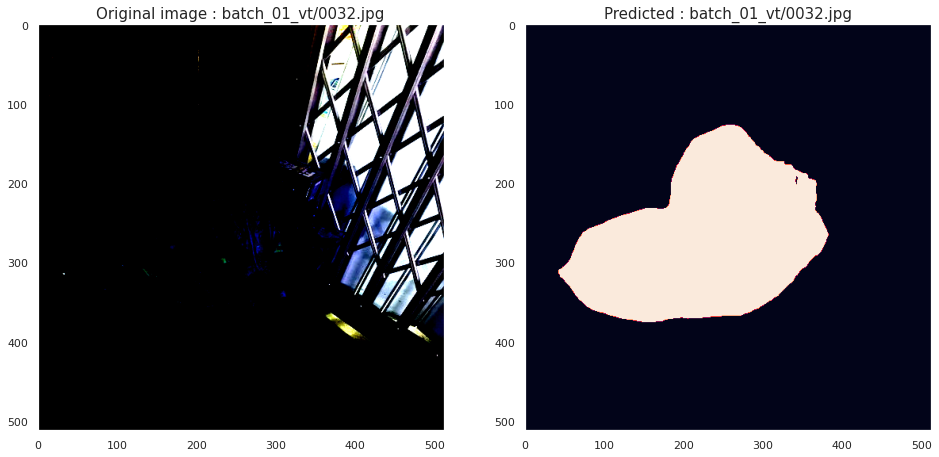

In [25]:
# 첫번째 batch의 추론 결과 확인
for imgs, image_infos in test_loader:
    image_infos = image_infos
    temp_images = imgs
    
    model.eval()
    # inference
    outs = model(torch.stack(temp_images).to(device))
    oms = torch.argmax(outs.squeeze(), dim=1).detach().cpu().numpy()
    
    break

i = 3
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 16))

print('Shape of Original Image :', list(temp_images[i].shape))
print('Shape of Predicted : ', list(oms[i].shape))
print('Unique values, category of transformed mask : \n', [{int(i),category_names[int(i)]} for i in list(np.unique(oms[i]))])

# Original image
ax1.imshow(temp_images[i].permute([1,2,0]))
ax1.grid(False)
ax1.set_title("Original image : {}".format(image_infos[i]['file_name']), fontsize = 15)

# Predicted
ax2.imshow(oms[i])
ax2.grid(False)
ax2.set_title("Predicted : {}".format(image_infos[i]['file_name']), fontsize = 15)

plt.show()

## submission을 위한 test 함수 정의

In [26]:
def test(model, data_loader, device):
    size = 256
    transform = A.Compose([A.Resize(256, 256)])
    print('Start prediction.')
    model.eval()
    
    file_name_list = []
    preds_array = np.empty((0, size*size), dtype=np.long)
    
    with torch.no_grad():
        for step, (imgs, image_infos) in enumerate(test_loader):

            # inference (512 x 512)
            outs = model(torch.stack(imgs).to(device))
            oms = torch.argmax(outs.squeeze(), dim=1).detach().cpu().numpy()

            # resize (256 x 256)
            temp_mask = []
            
            for i, (img, mask) in enumerate(zip(np.stack(imgs), oms)):
                transformed = transform(image=img, mask=mask)
                mask = transformed['mask']
                temp_mask.append(mask)

            oms = np.array(temp_mask)
            
            oms = oms.reshape([oms.shape[0], size*size]).astype(int)
            preds_array = np.vstack((preds_array, oms))
            
            file_name_list.append([i['file_name'] for i in image_infos])
    print("End prediction.")
    file_names = [y for x in file_name_list for y in x]
    
    return file_names, preds_array

## submission.csv 생성

In [27]:
start_time = datetime.datetime.now()
# sample_submisson.csv 열기
submission = pd.read_csv('./submission/sample_submission.csv', index_col=None)

# test set에 대한 prediction
file_names, preds = test(model, test_loader, device)

# PredictionString 대입
for file_name, string in zip(file_names, preds):
    submission = submission.append({"image_id" : file_name, "PredictionString" : ' '.join(str(e) for e in string.tolist())}, 
                                   ignore_index=True)

# submission.csv로 저장
submission.to_csv("./submission/deeplabv3plus_resnet50_512_mixloss9.csv", index=False)
print(datetime.datetime.now() - start_time)

Start prediction.
End prediction.
0:04:59.843027


## Reference

